In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<p>Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.</p>

In [97]:
df = pd.read_csv("datos/Invistico_Airline.csv")
df.sample(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1479,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2152,4,2,4,4,3,4,5,3,1,1,3,4,3,3,1,0.0
51139,dissatisfied,Female,disloyal Customer,23,Business travel,Eco,1998,3,0,3,5,4,3,4,4,1,4,3,2,1,4,0,3.0
61850,satisfied,Male,disloyal Customer,23,Business travel,Eco,1996,5,0,5,4,2,5,2,2,5,5,5,4,3,2,18,8.0
8984,satisfied,Female,Loyal Customer,11,Personal Travel,Eco,1657,3,3,3,3,3,4,4,4,4,4,4,4,4,3,0,0.0
100349,satisfied,Male,Loyal Customer,42,Business travel,Eco,1196,4,3,3,3,4,4,4,4,5,1,1,5,1,4,0,0.0


<p> Nuestra VR sería satisfaction que cuenta con dos subcategorías: satisfied and dissatisfied lo que nos va a facilitar aplicar los modelos de predicción. </p>

<p>Explicar los datos y las variables disponibles en el conjunto de datos seleccionado</p>

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

<p> Nos encontramos con un gran conjunto de variables que son falsas numéricas ya que mantienen la puntuación del servicio en los rangos de 0 a 5.</p>

<p>Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.</p>

In [99]:
df.shape

(129880, 23)

In [100]:
df.isnull().sum()


satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [101]:
df.duplicated().sum()

0

In [102]:
df[df["Arrival Delay in Minutes"] == 0.0]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129869,satisfied,Female,disloyal Customer,55,Personal Travel,Eco,1953,5,2,5,4,1,5,5,1,1,1,3,3,4,1,0,0.0
129871,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,3,2,5,2,2,4,5,4,4,3,2,9,0.0
129872,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,3,4,5,4,4,5,4,4,3,4,4,4,0.0
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.0


<Axes: xlabel='Arrival Delay in Minutes'>

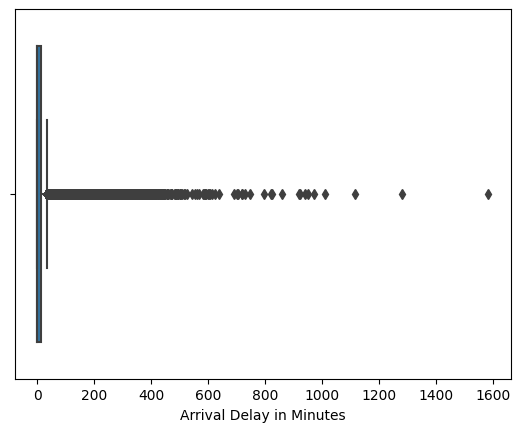

In [103]:
sns.boxplot(x="Arrival Delay in Minutes", data= df)

In [104]:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [105]:
df.sample(3)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
2502,dissatisfied,Male,Loyal Customer,41,Personal Travel,Business,902,1,3,1,2,3,1,3,5,5,1,5,4,5,4,0
123855,satisfied,Female,Loyal Customer,56,Business travel,Business,366,2,2,4,2,2,5,5,5,5,5,5,1,5,5,0
82641,dissatisfied,Female,Loyal Customer,56,Business travel,Business,1828,3,3,3,3,2,3,3,3,3,3,3,1,3,4,0


<p> Hemos eliminado la columna de "Arrival Delay in minutes porque hemos visto que tanto la moda como la mediana tenían un valor de cero. Además, de 129000 filas hemos visto que 72000 eran ceros de manera que concluimos que no nos iban a aportar ninguna información.</p>

In [106]:
#Las columnas están en inglés y en mayúsculas así que vamos a homogeneizarlas
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [107]:
columnas = {'satisfaction' : 'satisfaccion','Gender' : 'genero', 'Customer Type': 'tipo_de_cliente', 'Age':'edad', 'Type of Travel':'tipo_de_viaje',
            'Class': 'clase', 'Flight Distance':'distancia_de_vuelo', 'Seat comfort':'comfort_asiento','Departure/Arrival time convenient': 'puntualidad',
            'Food and drink': 'comida_y_bebida', 'Gate location': 'ubicación_puerta_embarque','Inflight wifi service': 'conexion_wifi_vuelo','Inflight entertainment':'ocio_vuelo',
            'Online support': 'soporte_online', 'Ease of Online booking': 'facilidad_reserva_online', 'On-board service':'servicio_durante_el_vuelo', 
            'Leg room service':'servicio_mayor_comodidad', 'Baggage handling': 'manejo_equipaje', 'Checkin service':'facturacion', 'Cleanliness':'limpieza',
            'Online boarding':'embarque_online', 'Departure Delay in Minutes':'retraso_salida_minutos'}

In [108]:
df.rename(columns=columnas,inplace=True)

In [109]:
df.head(2)

,satisfaccion,genero,tipo_de_cliente,edad,tipo_de_viaje,clase,distancia_de_vuelo,comfort_asiento,puntualidad,comida_y_bebida,ubicación_puerta_embarque,conexion_wifi_vuelo,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,servicio_mayor_comodidad,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310


In [110]:
for col in df.columns:
    print(f' Los valores únicos de la columna {col} son {df[col].unique()}')
    print('------------------')


 Los valores únicos de la columna satisfaccion son ['satisfied' 'dissatisfied']
------------------
 Los valores únicos de la columna genero son ['Female' 'Male']
------------------
 Los valores únicos de la columna tipo_de_cliente son ['Loyal Customer' 'disloyal Customer']
------------------
 Los valores únicos de la columna edad son [65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
------------------
 Los valores únicos de la columna tipo_de_viaje son ['Personal Travel' 'Business travel']
------------------
 Los valores únicos de la columna clase son ['Eco' 'Business' 'Eco Plus']
------------------
 Los valores únicos de la columna distancia_de_vuelo son [ 265 2464 2138 ... 5832 5120 4260]
------------------
 Los valores únicos de la columna comfort_asiento son [0 1 4 5 2 3]
------------------
 Los valores ú

<p> Hemos analizado los valores únicos de cada columna y hemos encontrado una gran cantidad de falsas numéricas que vamos a convertir en categóricas. Además, según la cantidad de valores únicos utilizaremos diferentes formas de categorizar, con pocas subcategorías haremos un mapeo de diccionarios, y con muchas subcategorías aplicaremos el método np.where con la intención de facilitar las futuras predicciones. </p>

In [111]:
satisfaccion = {0 : 'Nada satisfecho', 1: 'Insatisfecho', 2: 'Poco Satisfecho', 3 : 'Neutral', 4:'Satisfecho', 5: 'Muy satisfecho'}

In [112]:
lista = df.columns
lista

Index(['satisfaccion', 'genero', 'tipo_de_cliente', 'edad', 'tipo_de_viaje',
       'clase', 'distancia_de_vuelo', 'comfort_asiento', 'puntualidad',
       'comida_y_bebida', 'ubicación_puerta_embarque', 'conexion_wifi_vuelo',
       'ocio_vuelo', 'soporte_online', 'facilidad_reserva_online',
       'servicio_durante_el_vuelo', 'servicio_mayor_comodidad',
       'manejo_equipaje', 'facturacion', 'limpieza', 'embarque_online',
       'retraso_salida_minutos'],
      dtype='object')

In [113]:
sublista = lista[7:21]
sublista

Index(['comfort_asiento', 'puntualidad', 'comida_y_bebida',
       'ubicación_puerta_embarque', 'conexion_wifi_vuelo', 'ocio_vuelo',
       'soporte_online', 'facilidad_reserva_online',
       'servicio_durante_el_vuelo', 'servicio_mayor_comodidad',
       'manejo_equipaje', 'facturacion', 'limpieza', 'embarque_online'],
      dtype='object')

In [114]:
for i in sublista: 
    df[i]=df[i].map(satisfaccion)

In [115]:
df.head(2)

,satisfaccion,genero,tipo_de_cliente,edad,tipo_de_viaje,clase,distancia_de_vuelo,comfort_asiento,puntualidad,comida_y_bebida,ubicación_puerta_embarque,conexion_wifi_vuelo,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,servicio_mayor_comodidad,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,Nada satisfecho,Nada satisfecho,Nada satisfecho,Poco Satisfecho,Poco Satisfecho,Satisfecho,Poco Satisfecho,Neutral,Neutral,Nada satisfecho,Neutral,Muy satisfecho,Neutral,Poco Satisfecho,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,Nada satisfecho,Nada satisfecho,Nada satisfecho,Neutral,Nada satisfecho,Poco Satisfecho,Poco Satisfecho,Neutral,Satisfecho,Satisfecho,Satisfecho,Poco Satisfecho,Neutral,Poco Satisfecho,310


In [116]:
df['edad']=np.where(df['edad']<14, 'infantil', 'adulto')

In [117]:
df['edad'].unique()

array(['adulto', 'infantil'], dtype=object)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   satisfaccion               129880 non-null  object
 1   genero                     129880 non-null  object
 2   tipo_de_cliente            129880 non-null  object
 3   edad                       129880 non-null  object
 4   tipo_de_viaje              129880 non-null  object
 5   clase                      129880 non-null  object
 6   distancia_de_vuelo         129880 non-null  int64 
 7   comfort_asiento            129880 non-null  object
 8   puntualidad                129880 non-null  object
 9   comida_y_bebida            129880 non-null  object
 10  ubicación_puerta_embarque  129880 non-null  object
 11  conexion_wifi_vuelo        129880 non-null  object
 12  ocio_vuelo                 129880 non-null  object
 13  soporte_online             129880 non-null  

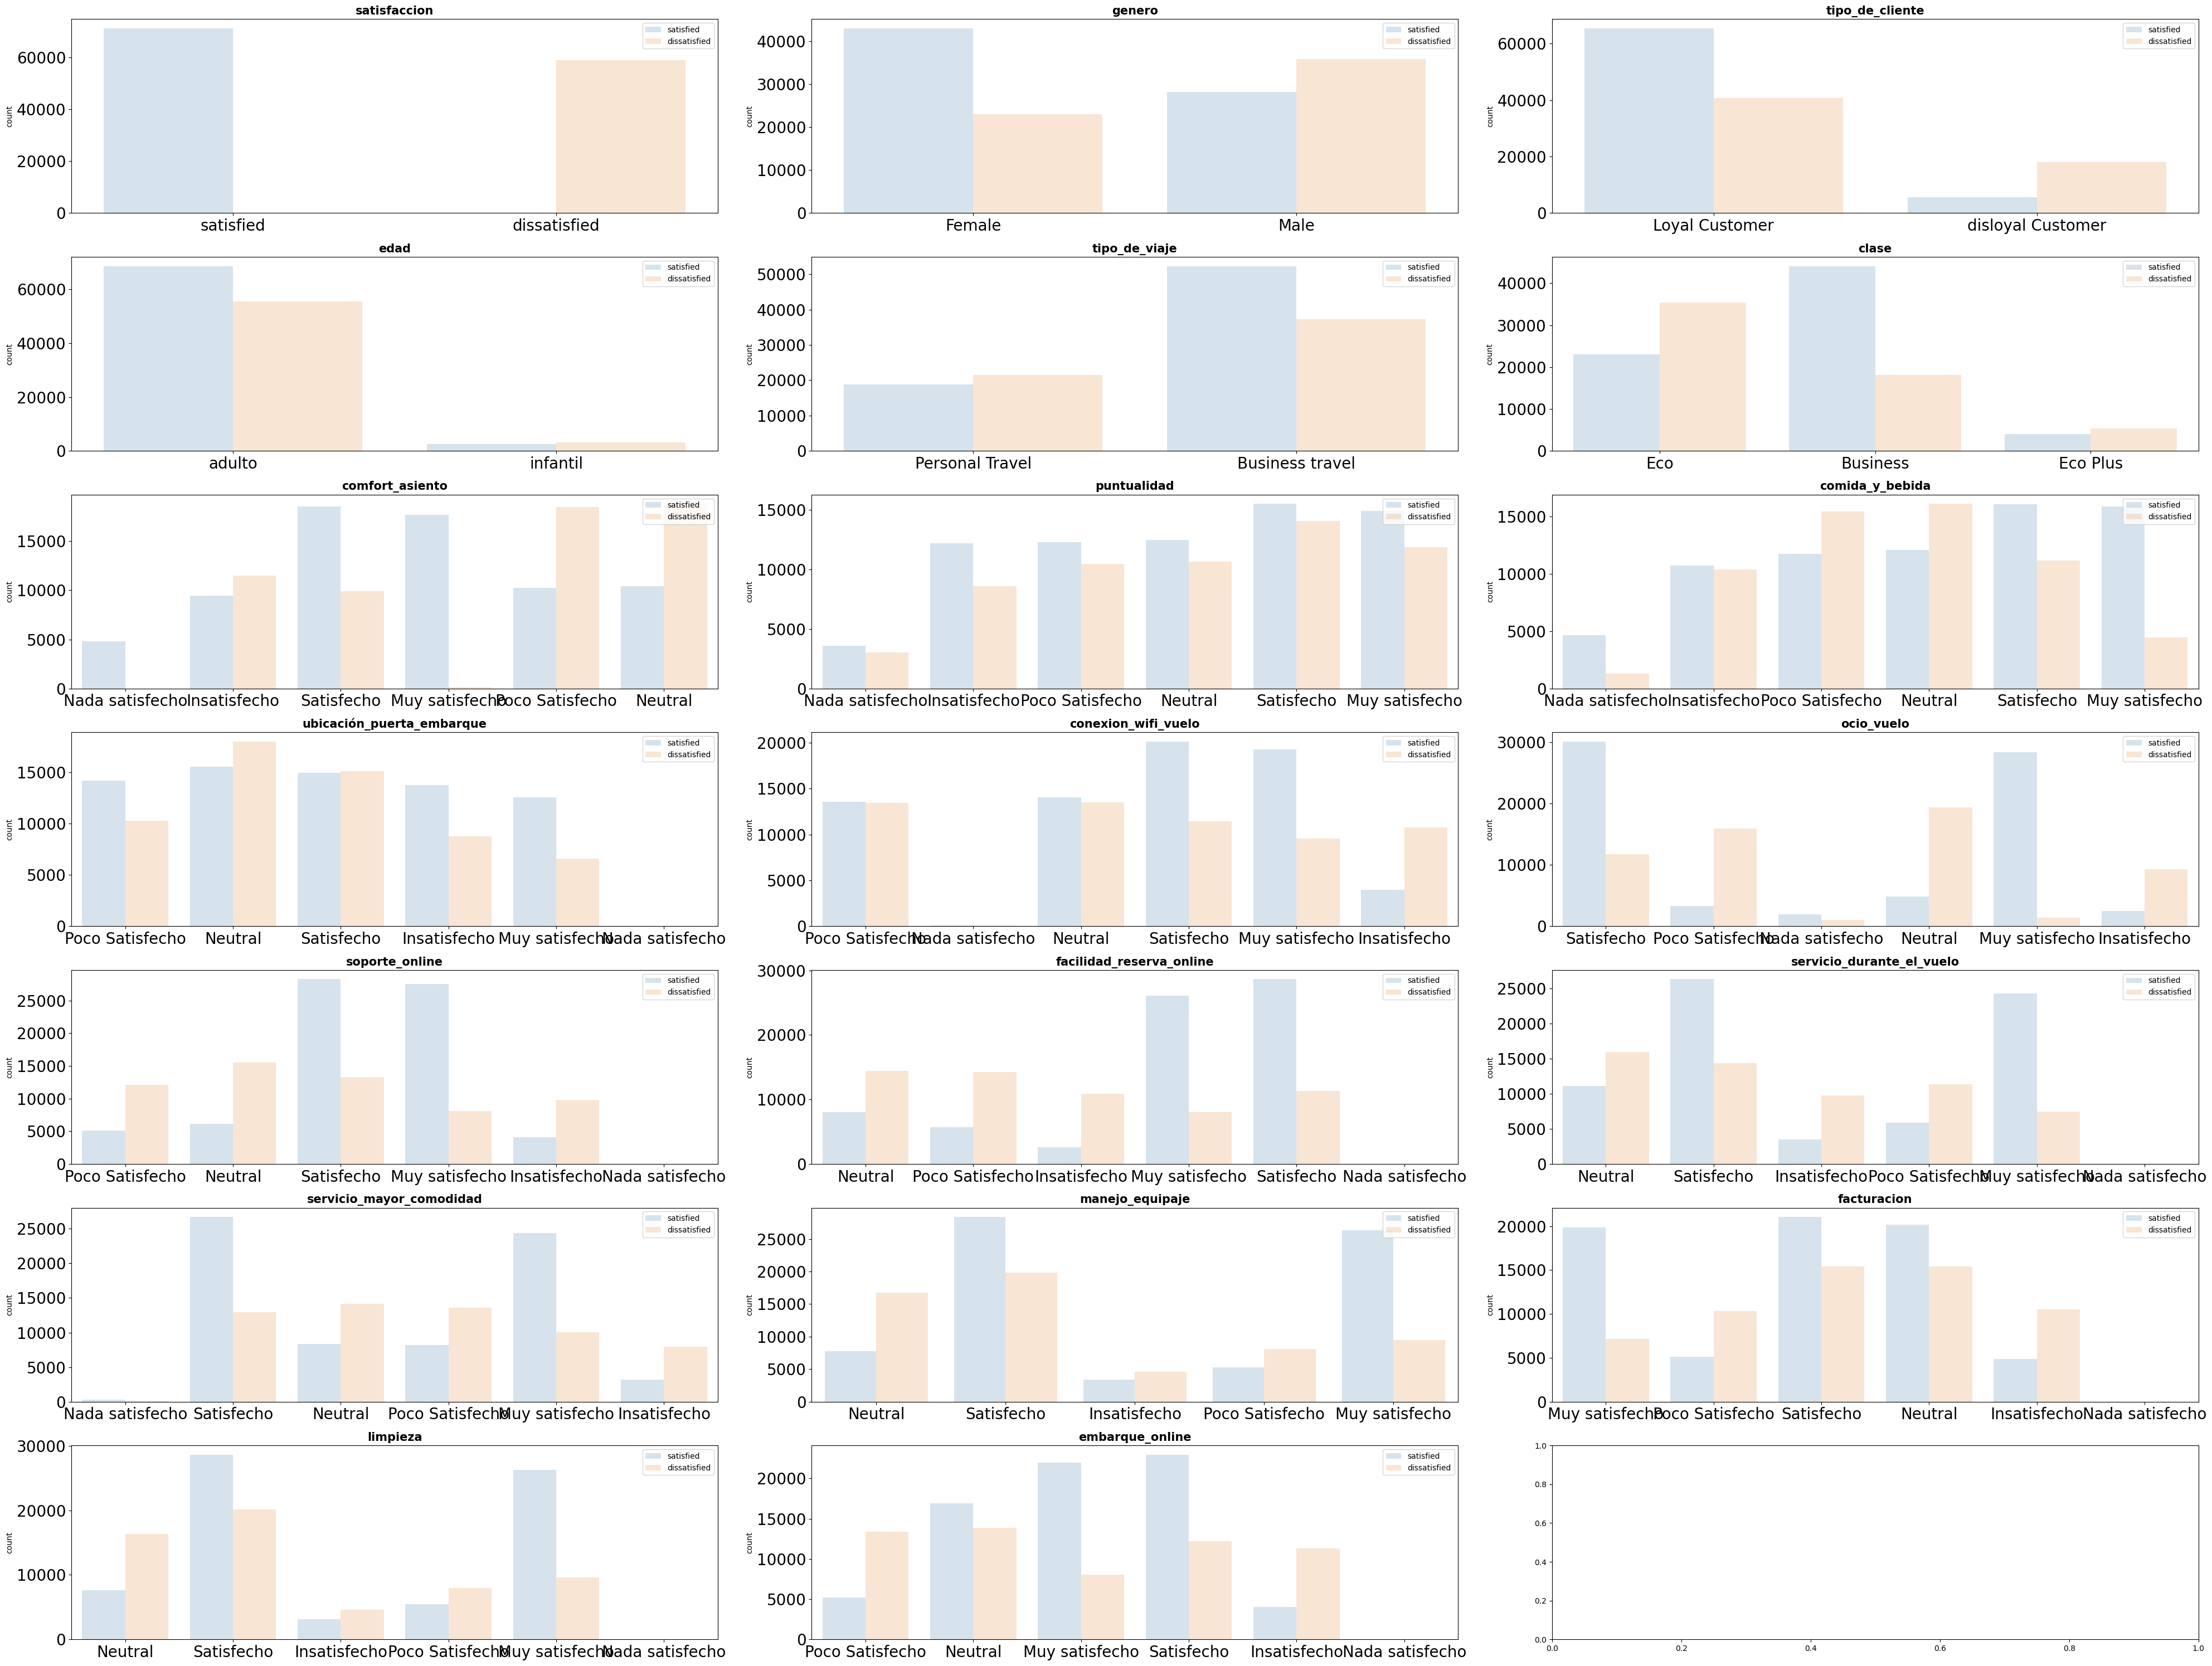

In [119]:
fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (40,30))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaccion",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

<p>Interpretación de los resultados.</p>

<p> En general podemos observar que los clientes que viajan en business están mucho más satisfechos que aquellos que viajan en otras clases, 
además podemos observar que este uso de la clase business probablemente esté relacionado con los viajes de negocios donde los índices de satisfacción son altos. Un dato que ha llamado nuestra atención ha sido la diferencia de satisfacccion en función del género.</p>
<p> A pesar de las diferencias hay aspectos donde los clientes satisfechos e insatisfechos coinciden en una valoración positiva como son la puntualidad, la limpieza o los servicios a través de internet. </p>

<Axes: xlabel='satisfaccion', ylabel='distancia_de_vuelo'>

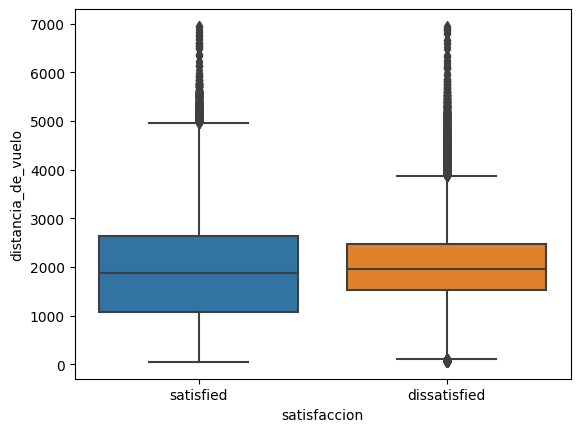

In [120]:
#Por último vamos a observar los outliers de nuestras variables numéricas
sns.boxplot(y="distancia_de_vuelo", x='satisfaccion', data= df)

<Axes: xlabel='retraso_salida_minutos'>

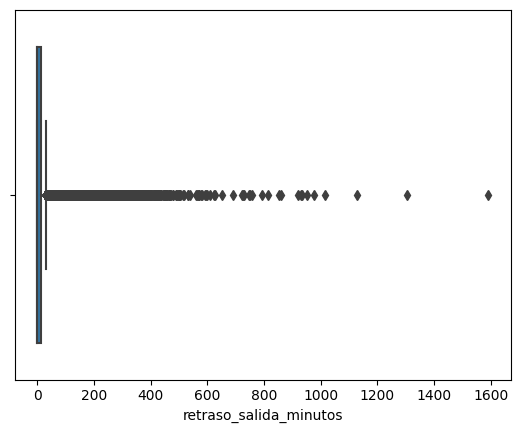

In [121]:
sns.boxplot(x="retraso_salida_minutos", data= df)

<Axes: xlabel='satisfaccion', ylabel='retraso_salida_minutos'>

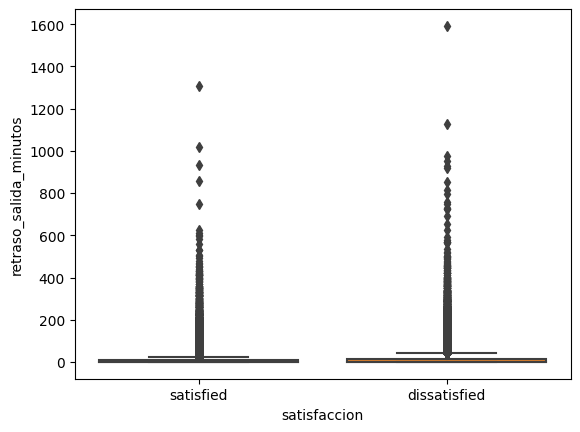

In [122]:
sns.boxplot(y="retraso_salida_minutos", x='satisfaccion', data= df)

<p> Vamos a eliminar cinco columnas que tras un exhaustivo análisis hemos decidido que duplicaban información o no eran relevantes para la satisfacción del vuelo.</p>

In [123]:
df.drop(['distancia_de_vuelo', 'edad', 'tipo_de_viaje','conexion_wifi_vuelo', 'servicio_mayor_comodidad'], axis=1, inplace=True)

In [124]:
df.to_pickle('datos/airline_limpieza.pkl')